In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# تنظیمات اولیه
image_size = (150, 150)
batch_size = 32
num_classes = 3

# مسیر پوشه دیتا (ساختار پوشه‌ها باید مانند: meningioma/, glioma/, pituitary/ باشد)
data_dir = 'C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Create-model-brain-tumor-type/Dataset'  # تغییر بده به مسیر دیتا
train_dir = os.path.join(data_dir, 'training')
val_dir = os.path.join(data_dir, 'validation')


# ساخت generator با split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [3]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # چون سه کلاس داریم
    #subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    #subset='validation',
    shuffle=True
)

Found 6427 images belonging to 3 classes.
Found 807 images belonging to 3 classes.


In [4]:
# تعریف مدل CNN ساده برای classification سه‌کلاسه
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')  # خروجی سه‌کلاسه
])

# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# آموزش مدل
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15
201/201 [==============================] - 168s 836ms/step - loss: 0.7455 - accuracy: 0.6376 - val_loss: 0.5463 - val_accuracy: 0.7633
Epoch 2/15
201/201 [==============================] - 177s 883ms/step - loss: 0.4864 - accuracy: 0.7853 - val_loss: 0.3968 - val_accuracy: 0.8178
Epoch 3/15
201/201 [==============================] - 175s 869ms/step - loss: 0.3101 - accuracy: 0.8740 - val_loss: 0.2450 - val_accuracy: 0.8971
Epoch 4/15
201/201 [==============================] - 179s 891ms/step - loss: 0.2418 - accuracy: 0.9046 - val_loss: 0.2776 - val_accuracy: 0.8910
Epoch 5/15
201/201 [==============================] - 168s 835ms/step - loss: 0.1880 - accuracy: 0.9272 - val_loss: 0.1399 - val_accuracy: 0.9492
Epoch 6/15
201/201 [==============================] - 164s 815ms/step - loss: 0.1347 - accuracy: 0.9499 - val_loss: 0.1575 - val_accuracy: 0.9492
Epoch 7/15
201/201 [==============================] - 164s 816ms/step - loss: 0.0977 - accuracy: 0.9651 - val_loss: 0.1394 -

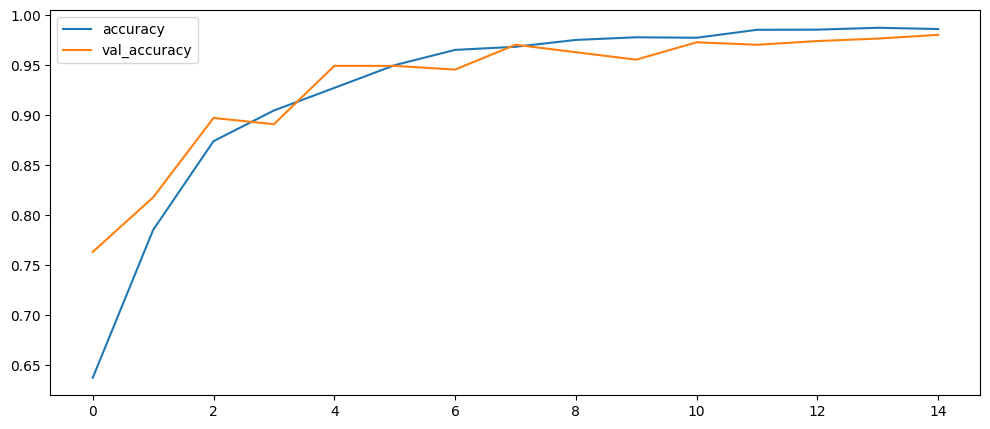

In [6]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['accuracy'], label = 'accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax.legend()

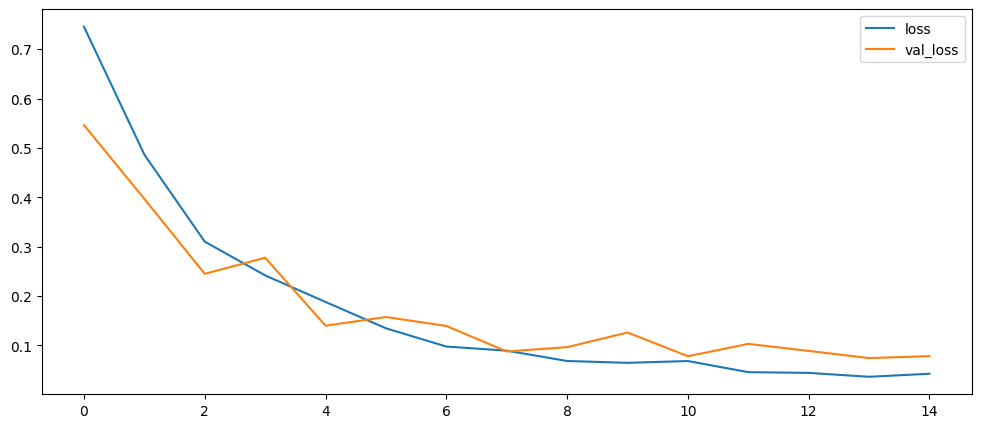

In [7]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label = 'loss')
ax.plot(history.history['val_loss'], label = 'val_loss')
ax.legend()

In [8]:
data_dir = 'C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Create-model-brain-tumor-type/Dataset'  # تغییر بده به مسیر دیتا
test_dir = os.path.join(data_dir, 'testing')

In [9]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # چون سه کلاس داریم
    #subset='training',
    shuffle=False
)

Found 443 images belonging to 3 classes.


In [10]:
loss_accuracy = model.evaluate(test_generator, verbose=0)
print('loss:', loss_accuracy[0])
print('accuracy:', loss_accuracy[1])

loss: 0.3859901428222656
accuracy: 0.9277652502059937


In [11]:
ytest = test_generator.classes

In [12]:
class_names = list(test_generator.class_indices.keys())

In [13]:
y_pred = np.argmax(model.predict(test_generator), axis=1)

14/14 [==============================] - 3s 232ms/step


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       132
           1       0.85      0.99      0.92       170
           2       1.00      0.87      0.93       141

    accuracy                           0.93       443
   macro avg       0.94      0.92      0.93       443
weighted avg       0.94      0.93      0.93       443



<Axes: >

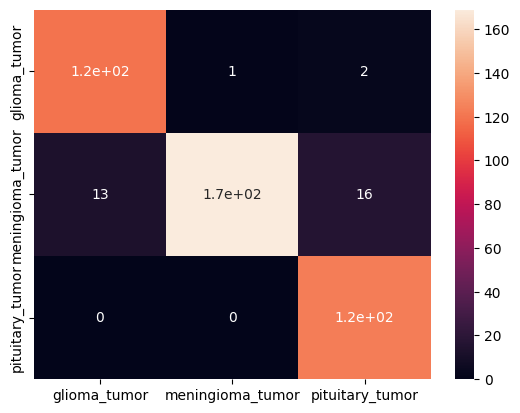

In [14]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(y_pred, ytest), annot=True, xticklabels=class_names, yticklabels=class_names)

In [15]:
# ذخیره مدل
model.save('tumor_type_classifier_model.h5')